<a href="https://colab.research.google.com/github/shareefat/Deep_learning_Projects/blob/main/Animal_prediction_in_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import os
df=os.listdir('/content/drive/MyDrive/Classroom/PGDDM 44 python/Animal & Bird Dataset')

In [137]:
data=[]
label=[]
for category in df:
  folder_path=os.path.join('/content/drive/MyDrive/Classroom/PGDDM 44 python/Animal & Bird Dataset',category)
  for file in os.listdir(folder_path):
    file_path=os.path.join(folder_path,file)
    data.append(file_path)
    label.append(category)

In [138]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,label,test_size=0.2,random_state=42)

In [139]:
data[:3]

label[:3]

['Bird', 'Bird', 'Bird']

In [140]:
df=os.listdir('/content/drive/MyDrive/Classroom/PGDDM 44 python/Animal & Bird Dataset')
df

['Bird',
 'Horse',
 'Tiger',
 'Goat',
 'Deer',
 'Cat',
 'Dog',
 'Duck',
 'Lion',
 'Frog']

In [141]:
label_map={}
for idx,category in enumerate(df):
  label_map[category]=idx
label_map

{'Bird': 0,
 'Horse': 1,
 'Tiger': 2,
 'Goat': 3,
 'Deer': 4,
 'Cat': 5,
 'Dog': 6,
 'Duck': 7,
 'Lion': 8,
 'Frog': 9}

In [142]:
y_train[:5]

['Duck', 'Horse', 'Bird', 'Dog', 'Cat']

In [143]:
y_train1=[]
for i in y_train:
  y_train1.append(label_map[i])
y_train1[:5]

[7, 1, 0, 6, 5]

In [144]:
y_test1=[]
for i in y_test:
  y_test1.append(label_map[i])
y_test1[:5]

[6, 8, 5, 0, 7]

In [145]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [146]:

def preprocess_img(data):
  img=load_img(data,target_size=(150,150))
  img_array=img_to_array(img)
  img_array=img_array/255
  return img_array

In [147]:
y=preprocess_img(data[0])
y.shape

(150, 150, 3)

In [148]:
import numpy as np
x_train1=[]
for i in x_train:
  x_train1.append(preprocess_img(i))
x_train1=np.array(x_train1)
x_train1.shape


(240, 150, 150, 3)

In [149]:
x_train1[:5]

array([[[[0.4117647 , 0.54509807, 0.72156864],
         [0.4117647 , 0.54509807, 0.72156864],
         [0.4117647 , 0.54509807, 0.72156864],
         ...,
         [0.42745098, 0.5882353 , 0.7607843 ],
         [0.42352942, 0.58431375, 0.75686276],
         [0.4117647 , 0.57254905, 0.74509805]],

        [[0.36862746, 0.5137255 , 0.6901961 ],
         [0.36862746, 0.5137255 , 0.6901961 ],
         [0.36862746, 0.5137255 , 0.6901961 ],
         ...,
         [0.43529412, 0.59607846, 0.76862746],
         [0.43137255, 0.5921569 , 0.7647059 ],
         [0.41960785, 0.5803922 , 0.7529412 ]],

        [[0.32941177, 0.49411765, 0.68235296],
         [0.32941177, 0.49411765, 0.68235296],
         [0.32941177, 0.49411765, 0.68235296],
         ...,
         [0.4392157 , 0.6       , 0.77254903],
         [0.43137255, 0.5921569 , 0.7647059 ],
         [0.41960785, 0.5803922 , 0.7529412 ]],

        ...,

        [[0.21960784, 0.36862746, 0.52156866],
         [0.21960784, 0.36862746, 0.52156866]

In [150]:
x_test1=[]
for i in x_test:
  x_test1.append(preprocess_img(i))
x_test1=np.array(x_test1)
x_test1.shape

(60, 150, 150, 3)

In [158]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,AveragePooling2D

In [160]:
model=tf.keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    AveragePooling2D(2,2),

    Flatten(),
    Dense(128,activation='relu'),
    Dense(len(df),activation='softmax')  #softmax equation  e^z=e^z/
                                                                   #e^z1+e^z2+e^z3......
])



In [161]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [162]:
model.fit(x_train1,np.array(y_train1),epochs=10)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.1252 - loss: 2.5216
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.1729 - loss: 2.2837
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.2276 - loss: 2.1933
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.2610 - loss: 1.9668
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.4265 - loss: 1.7120
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5142 - loss: 1.4710
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5565 - loss: 1.3240
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.6560 - loss: 1.0150
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7875 - loss: 0.7203
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8790 - loss: 0.4612


In [163]:
model.evaluate(x_test1,np.array(y_test1))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 612ms/step - accuracy: 0.2285 - loss: 2.6847


[2.598616600036621, 0.23333333432674408]

#making predicitons

In [184]:
img_path='/content/drive/MyDrive/Classroom/PGDDM 44 python/Animal & Bird Dataset/Dog/13.jpg'
img=load_img(img_path,target_size=(150,150))
img_array=img_to_array(img)
img_array=img_array/255

y_pred=model.predict(np.array([img_array]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


array([[0.02357102, 0.0023741 , 0.00350198, 0.01835954, 0.01089541,
        0.0277466 , 0.89691323, 0.00580784, 0.00977608, 0.0010542 ]],
      dtype=float32)

Our Model Predict  Dog


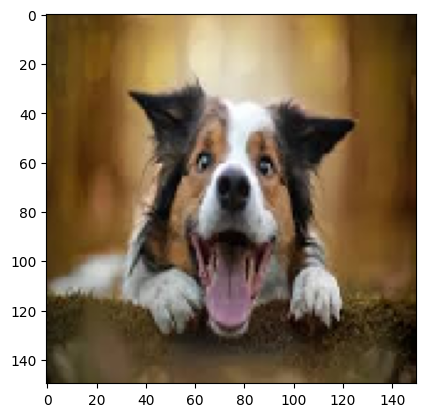

In [185]:
print("Our Model Predict ",df[np.argmax(y_pred)])

plt.imshow(img)
plt.show()